<a href="https://colab.research.google.com/github/fatemehes75/Hand-written-digit-classifier-using-numpy/blob/main/Hand_written_digit_classifier_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand written digit classifier using numpy

Importing Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

Importing Dataset

In [2]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')#Normalization
y = to_categorical(y)#Converts a class vector (0 to 9) to binary class matrix.

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Spliting dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=1)

In [5]:
print(y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Definning neural network

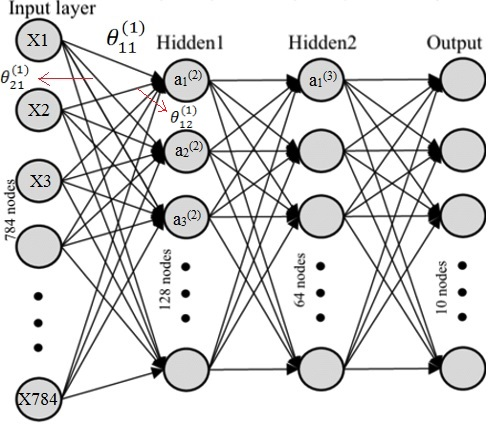

In [8]:
class Network():

    def __init__(self,sizes,epochs=10,learning_rate=0.3):
        self.sizes = sizes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.params = self.initialization()

    def sigmoid_func(self,x,derivative=False):
      g = 1/(1+np.exp(-x))
      if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
      return g
    def softmax_func(self,x,derivative=False):
        exps = np.exp(x-x.max())
        s = exps/np.sum(exps,axis=0)
        if derivative:
            return exps/np.sum(exps,axis=0) * (1-exps/np.sum(exps, axis=0)) 
        return s

    def initialization(self):
        inputnodes=self.sizes[0]
        hiddennodes1=self.sizes[1]
        hiddennodes2=self.sizes[2]
        outputnodes=self.sizes[3]

        params = { 'theta1':np.random.randn(hiddennodes1,inputnodes)*np.sqrt(1./hiddennodes1), #random theta*(sqrt(1/n))
                   'theta2':np.random.randn(hiddennodes2,hiddennodes1)*np.sqrt(1./hiddennodes2),
                   'theta3':np.random.randn(outputnodes,hiddennodes2)*np.sqrt(1./outputnodes)}
        return params

    def forward_prop(self,x_train): 
        params = self.params
        params['a1'] = x_train
        params['z2'] = np.dot(params["theta1"], params['a1']) #np.dot => If both inputs are 2-D arrays, it is matrix multiplication
        params['a2'] = self.sigmoid_func(params['z2'])
        params['z3'] = np.dot(params["theta2"], params['a2'])
        params['a3'] = self.sigmoid_func(params['z3'])
        params['z4'] = np.dot(params["theta3"], params['a3'])
        params['a4'] = self.softmax_func(params['z4'])
        return params['a4']

    def backward_prop(self, y_train, output):
        params = self.params
        newtheta = {}
        delta = 2*(output-y_train)/output.shape[0] * self.softmax_func(params['z4'],derivative=True)
        newtheta['theta3'] = np.outer(delta,params['a3'])
        delta = np.dot(params['theta3'].T,delta) * self.sigmoid_func(params['z3'],derivative=True)
        newtheta['theta2'] = np.outer(delta,params['a2'])
        delta = np.dot(params['theta2'].T,delta) * self.sigmoid_func(params['z2'],derivative=True)
        newtheta['theta1'] = np.outer(delta,params['a1'])
        return newtheta

    def new_thetas(self,newtheta):
        for key, value in newtheta.items():
            self.params[key] = self.params[key]-self.learning_rate * value

    def Evaluation(self,x_val,y_val):
        predictions = []
        for x, y in zip(x_val,y_val):
            output = self.forward_prop(x) #doing a forward pass of x
            max_output = np.argmax(output) 
            predictions.append(max_output == np.argmax(y))  #checks if the indices of the maximum value in the output equals the indices in the label y
            # sum over prediction
        return np.mean(predictions) #return the average of the accuracy 

    def train(self,x_train,y_train,x_val,y_val):
        # Convert input data to numpy arrays
        x_train = x_train.values.astype(np.float32)
        y_train = y_train.astype(np.float32)
        x_val = x_val.values.astype(np.float32)
        y_val = y_val.astype(np.float32)

        t_start = time.time()
        #train over all epochs
        for i in range(self.epochs):
            for x,y in zip(x_train,y_train):
                output = self.forward_prop(x)
                newtheta = self.backward_prop(y,output)
                self.new_thetas(newtheta)
            accuracy = self.Evaluation(x_val, y_val)
            print('epoch:{0},time:{1:.2f}s,accuracy: {2:.3f}%'.format(i+1,time.time() - t_start, accuracy * 100))

In [9]:
ANN = Network(sizes=[784, 128, 64, 10])
ANN.train(x_train,y_train,x_val,y_val)

epoch:1,time:56.03s,accuracy: 91.486%
epoch:2,time:109.09s,accuracy: 93.936%
epoch:3,time:161.96s,accuracy: 94.929%
epoch:4,time:217.21s,accuracy: 95.607%
epoch:5,time:270.63s,accuracy: 95.964%
epoch:6,time:323.12s,accuracy: 96.293%
epoch:7,time:378.50s,accuracy: 96.564%
epoch:8,time:431.55s,accuracy: 96.750%
epoch:9,time:484.62s,accuracy: 96.821%
epoch:10,time:539.45s,accuracy: 96.900%
